***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [24]:
dados = pd.read_csv('dados.csv')


### Visualize o conteúdo do DataFrame

In [25]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [26]:
classes = [0, 1576, 3152, 7880, 15760, 200000]


### 2º Definir os labels das classes

In [27]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [6]:
frequencia = pd.value_counts(pd.cut( x = dados.Renda,
                             bins= classes, 
                             labels= labels, 
                             include_lowest= True
                            ))
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
percentual = pd.value_counts(pd.cut( dados.Renda, 
                            bins= classes, 
                            labels= labels,
                            include_lowest= True
                           ), normalize = True) *100 
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
df_freq_percent = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})

df_freq_percent.round(2).sort_index(ascending= False)

,Frequência,Porcentagem(%)
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

In [9]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

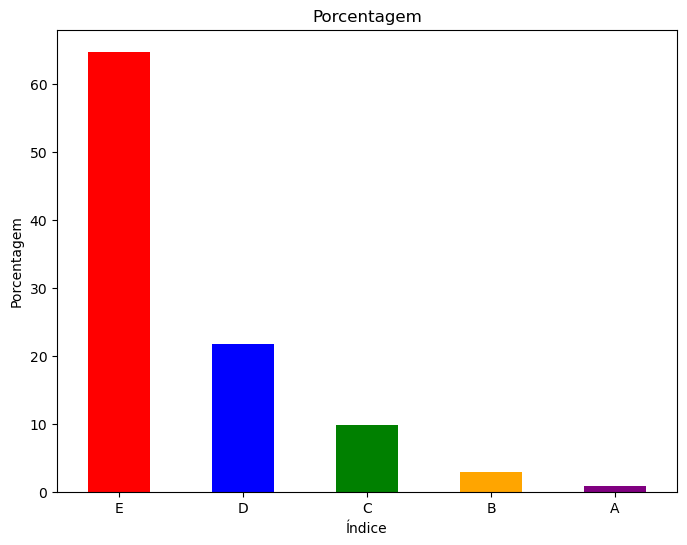

In [10]:
# Criar um gráfico de barras com os dados do seu dataframe
ax = df_freq_percent['Porcentagem(%)'].plot(kind='bar', figsize=(8, 6), color= colors  , rot=0)

# Adicionar um título e rótulos aos eixos do gráfico
ax.set_title('Porcentagem')
ax.set_xlabel('Índice')
ax.set_ylabel('Porcentagem')

# Exibir o gráfico
plt.show()

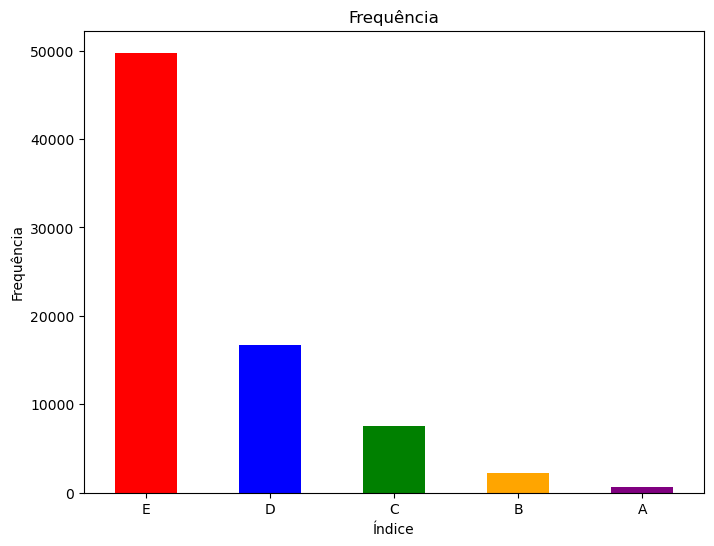

In [11]:
# Criar um gráfico de barras com os dados do seu dataframe
ax = df_freq_percent.Frequência.plot(kind='bar', figsize=(8, 6), color= colors, rot=0)

# Adicionar um título e rótulos aos eixos do gráfico
ax.set_title('Frequência')
ax.set_xlabel('Índice')
ax.set_ylabel('Frequência')

# Exibir o gráfico
plt.show()

> ### Conclusões

Examinando a renda 76.840 pessoa que participaram da entrevista, percebemos que 86% vivem de 1 a 5 salários minimos, sendo 64.75% vivendo com até 2 salários, enquanto menos de 1%, aproxidamente 0,79% vivem com mais de 25 salários mininos, que da um valor superior a 15 mil reais por mês



### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='red'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [12]:
import seaborn as sns

In [13]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<Axes: title={'center': 'Distribuição de Frequências - IDADE'}, xlabel='Anos', ylabel='Count'>

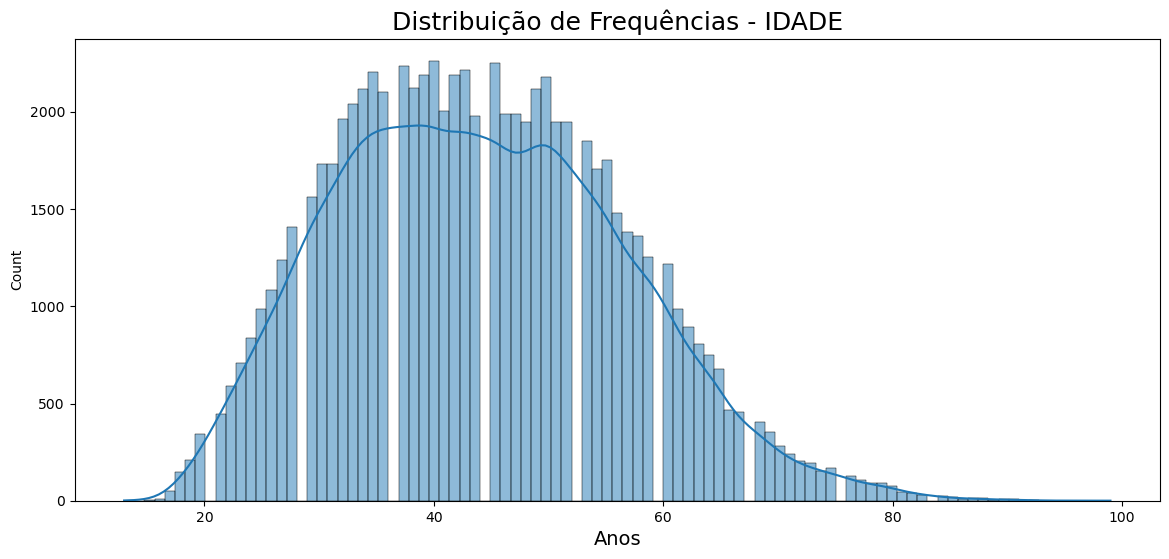

In [14]:

ax = sns.histplot(dados.Idade, kde=True, stat='count')
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - IDADE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Anos', ylabel='Density'>

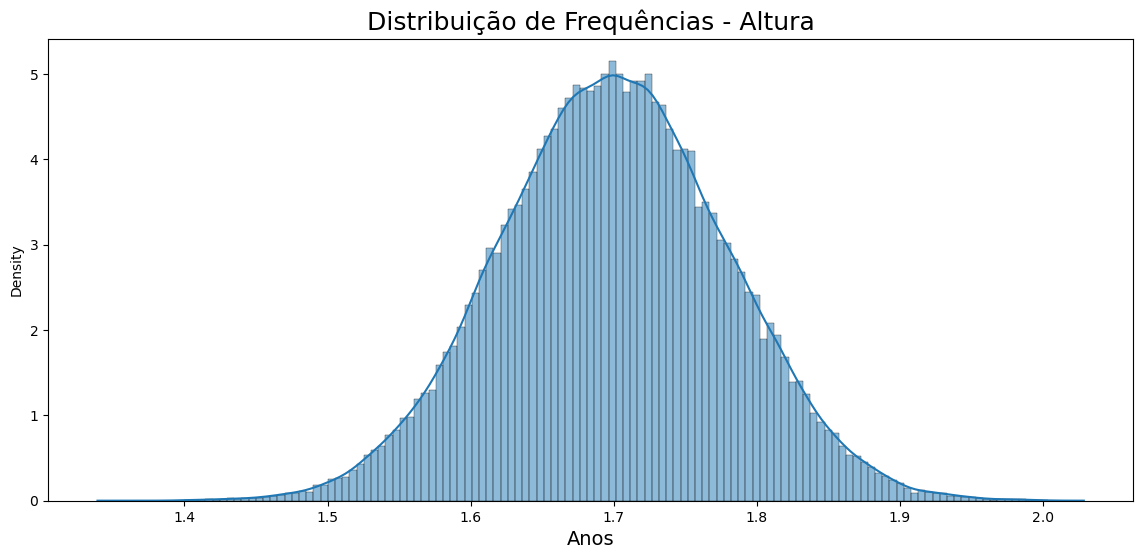

In [15]:

ax = sns.histplot(dados.Altura, kde=True, stat='density')
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências - Anos de Estudo'}, xlabel='Anos', ylabel='Count'>

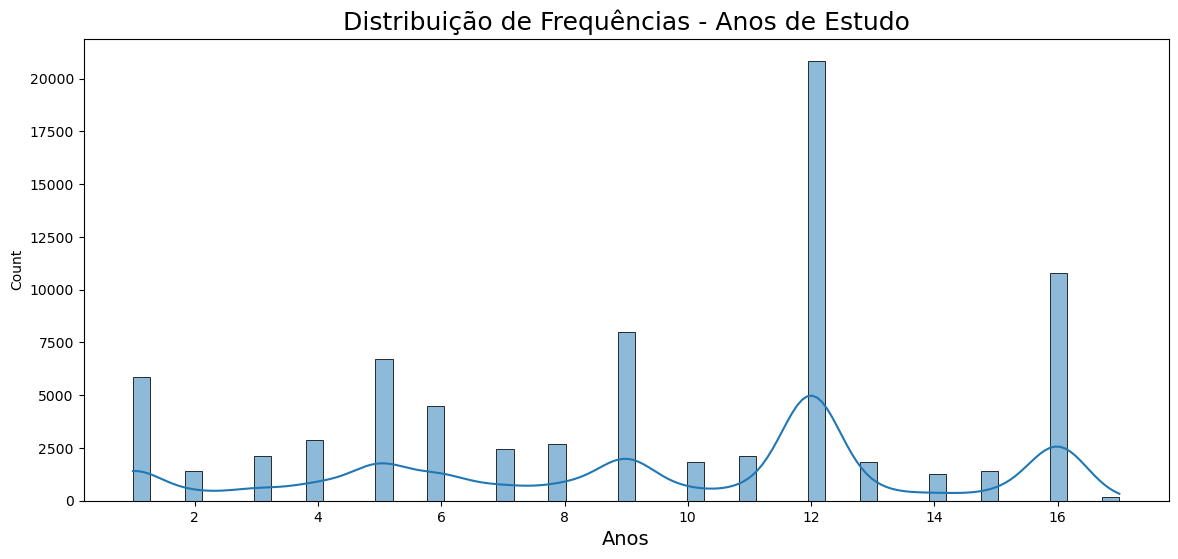

In [16]:

ax = sns.histplot(dados['Anos de Estudo'], kde=True, stat='count')
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

In [17]:
sexo_estudo = pd.crosstab(dados.Sexo, dados['Anos de Estudo'])

sexo_estudo.rename(sexo, inplace=True)
sexo_estudo.rename(columns= anos_de_estudo, inplace=True)
sexo_estudo

NameError: name 'sexo' is not defined

In [ ]:
percent_sexo_estudo = pd.crosstab(dados.Sexo, dados['Anos de Estudo'], normalize=True) *100

percent_sexo_estudo.rename(sexo, inplace=True)
percent_sexo_estudo.rename(columns= anos_de_estudo, inplace=True)
percent_sexo_estudo.round(2)

> ### Conclusões

Podemos notas que o histograma de Idade e Altura foram uma distribuição normal, ou seja, há uma média quase assimetrica para a idade e uma média bem assimetrica para altura.

Já para a distribuição de Anos de Estudo, nota-se que o sexo masculino tem um público com mais anos de estudo do que as mulheres, posso então supor que por conta da gereção que elas pertencem, as mulheres ainda não tinham espaço para o estudo/trabalho como nos dias de hoje 

### Construa uma tabela de frequências e uma com os percentuais usando as váriaveis disponíveis 
#### <font color='red'>Avalie o resultado da tabela e escreva suas principais conclusões</font>


## Frequência de cor/anos de estudo

In [ ]:
freq_cor_estudo = ## Frequência de gênero/cor

## Pencentual de cor/anos de estudo

In [ ]:
percent_cor_estudo = pd.crosstab(dados.Cor, dados['Anos de Estudo'], normalize=True) *100## Frequência de gênero/cor

percent_cor_estudo.rename(cor, inplace=True)
percent_cor_estudo.rename(columns=anos_de_estudo, inplace=True)
percent_cor_estudo.round(2)

## Frequência de gênero/cor

In [ ]:
freq_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor)

freq_sexo_cor.rename(sexo, inplace=True)
freq_sexo_cor.rename(columns=cor, inplace=True)
freq_sexo_cor## Média salárial por cor e gênero 

## percentual de gênero/cor

In [ ]:
percent_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) *100

percent_sexo_cor.rename(sexo, inplace=True)
percent_sexo_cor.rename(columns=cor, inplace= True)

percent_sexo_cor.round(2)## Média salárial por cor e gênero 

## Média salárial por cor e gênero 

In [ ]:
freq_sex_cor_renda = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= 'mean', 
                                                   values= dados.Renda)

freq_sex_cor_renda.rename(sexo, inplace=True)
freq_sex_cor_renda.rename(columns=cor, inplace= True)

freq_sex_cor_renda.round(2)

## Média salárial por anos de estudo 

In [18]:
frequencia.to_frame()

,Renda
E,49755
D,16700
C,7599
B,2178
A,608


In [22]:
renda_estudo = pd.crosstab(dados.Sexo,dados['Anos de Estudo'], aggfunc= 'mean',
                          values= dados.Renda)

renda_estudo.rename(sexo, inplace=True)
renda_estudo.rename(columns=anos_de_estudo, inplace=True)
renda_estudo.round(2)

NameError: name 'sexo' is not defined

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: title={'center': 'Distribuição de Frequências - RENDA - Pessoas com renda até R$ 20.000,00'}, xlabel='R$', ylabel='Count'>

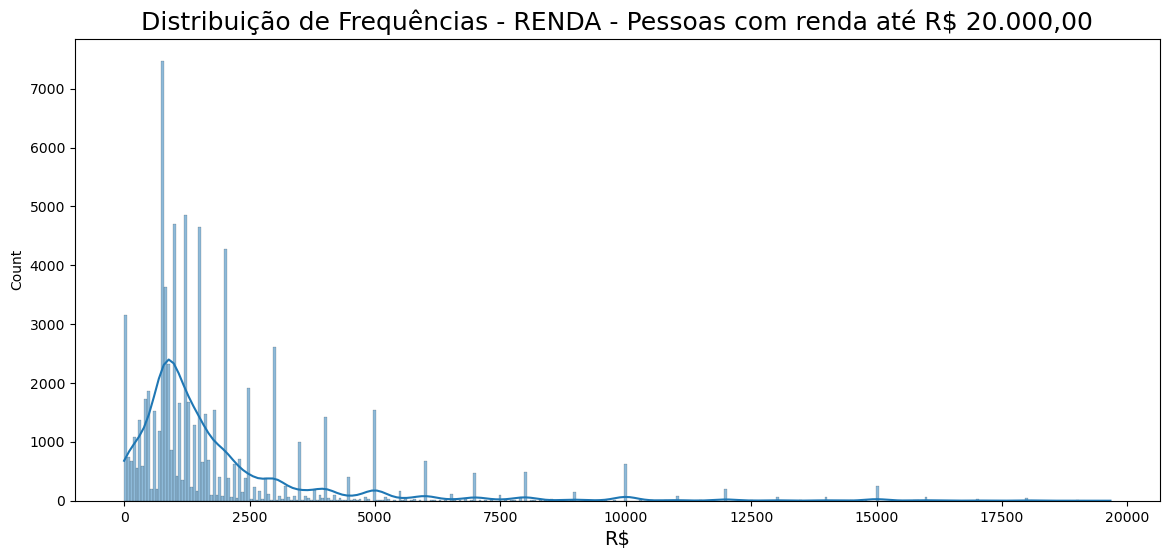

In [20]:
ax = sns.histplot(dados.query('Renda < 20000')['Renda'], kde= True, stat= 'count')
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA - Pessoas com renda até R$ 20.000,00', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

É possível notar que a maior parte dos entrevistados são homens, principlamente da cor Branca e Parda, seguido de mulheres também Brancas e Pardas, o que mostra que esse essa pesquisa não foi em locais mais pobres e comunidades, visto que 54% da população do Brasil é Negra, e no estudo só aparece 11% dessa população 

Percebe-se também que a as pessoas Brancas e Pardas tem mais anos de estudos em comparação com as outras raças

Um dados estranho é que as pessoas que se indentificam com a cor amarela, mesmo sendo minoria e com pouco estudo, possuem uma média salárial maior, o que pode insinuar a existencia de dados outliers na pesquisa

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [21]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [224]:
dados.Renda.sort_values()
dados.Renda.median()

1200.0

### Obtenha a moda

In [221]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [231]:
 (dados.Renda - dados.Renda.mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [233]:
dados.Renda.var().round(2)

11044906.01

### Obtenha o desvio-padrão

In [235]:
dados.Renda.std().round(2)

3323.39

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

## Média 

In [246]:
renda_estudo = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= 'mean',
                          values= dados.Renda)

renda_estudo.rename(sexo, inplace=True)
renda_estudo.rename(columns=cor, inplace=True)
renda_estudo.round(2)

Cor,Indígena,Branca,Negra,Amarela,Parda
Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


# Mediana 

In [242]:
renda_estudo_mediana = pd.crosstab(dados.Sexo,dados.Cor, aggfunc= 'median',
                          values= dados.Renda)

renda_estudo_mediana.rename(sexo, inplace=True)
renda_estudo_mediana.rename(columns=cor, inplace=True)
renda_estudo_mediana.round(2)

Cor,Indígena,Branca,Negra,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


# Moda

In [244]:
renda_estudo_max = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= 'max',
                          values= dados.Renda)

renda_estudo_max.rename(sexo, inplace=True)
renda_estudo_max.rename(columns=cor, inplace=True)
renda_estudo_max.round(2)

Cor,Indígena,Branca,Negra,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


In [251]:
renda_estatisticas_por_sexo_e_cor = pd.crosstab(dados.Cor, 
                                                dados.Sexo, 
                                                values = dados.Renda, 
                                                aggfunc = {'mean', 'median', 'max'})
renda_estatisticas_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_estatisticas_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Negra        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões



### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [254]:
renda_dispersao_por_sexo_e_cor = pd.crosstab(dados.Cor, 
                                         dados.Sexo,
                                         aggfunc = ('mad', 'var', 'std'),
                                         values = dados.Renda).round(2)
renda_dispersao_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_dispersao_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_dispersao_por_sexo_e_cor

/var/folders/rq/xwxzx3l97fj2k8x602q5_g0r0000gn/T/ipykernel_5840/39335851.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_dispersao_por_sexo_e_cor = pd.crosstab(dados.Cor,
/var/folders/rq/xwxzx3l97fj2k8x602q5_g0r0000gn/T/ipykernel_5840/39335851.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_dispersao_por_sexo_e_cor = pd.crosstab(dados.Cor,
/var/folders/rq/xwxzx3l97fj2k8x602q5_g0r0000gn/T/ipykernel_5840/39335851.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  renda_dispersao_por_sexo_e_cor = pd.crosstab(dados.Cor,
/var/folders/rq/xwxzx3l97fj2k8x602q5_g0r0000gn/T/ipykernel_5840/39335851.py:1: FutureWarning: The 'mad' method i

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Negra       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats



### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...